<a href="https://colab.research.google.com/github/lrupp25/Data2000HW/blob/main/10_17_neural_networks_ipynb_and_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade numpy pandas matplotlib seaborn tensorflow pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
  

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index))

test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [ ]:
train_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0


## Represent data

The following code cell creates preprocessing layers outputting three features:

* `latitude` X `longitude` (a feature cross)
* `median_income`
* `population`

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented. The transformations (collected in `prepocessing_layers`) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model.

We'll use `preprocessing_layers` for both our linear regression model and our neural network model.

(The [`keras.FeatureSpace`](https://keras.io/examples/structured_data/structured_data_classification_with_feature_space) utility offers an alternative to building individual Keras preprocessing layers -- give it a try, if you're feeling adventurous!)

In [ ]:
# Keras Input tensors of float values - or defining inputs for desired data points, specifies data type, name, shape
inputs = {
    'latitude':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='latitude'),
    'longitude':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='longitude'),
    'median_income':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='median_income'),
    'population':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='population')
}

# Normalization Layers

This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1. It accomplishes this by precomputing the mean and variance of the data, and calling `(input - mean) / sqrt(var)` at runtime.

The mean and variance values for the layer must be either supplied on construction or learned via `adapt()`. `adapt()` will compute the mean and variance of the data and store them as the layer's weights. `adapt()` should be called before `fit()`, `evaluate()`, or `predict()`.

In [ ]:
# Create a Normalization layer to normalize the median_income data.
median_income = tf.keras.layers.Normalization(
    name='normalization_median_income',
    axis=None)
median_income.adapt(train_df['median_income'])
median_income = median_income(inputs.get('median_income'))

# Create a Normalization layer to normalize the population data.
population = tf.keras.layers.Normalization(
    name='normalization_population',
    axis=None)
population.adapt(train_df['population'])
population = population(inputs.get('population'))

# Create a Normalization layer to normalize the latitude data.
latitude = tf.keras.layers.Normalization(
    name='normalization_latitude',
    axis=None)
latitude.adapt(train_df['latitude'])
latitude = latitude(inputs.get('latitude'))

# Create a Normalization layer to normalize the longitude data.
longitude = tf.keras.layers.Normalization(
    name='normalization_longitude',
    axis=None)
longitude.adapt(train_df['longitude'])
longitude = longitude(inputs.get('longitude'))

# Create Normalization layers to normalize the median_house_value data.
# Because median_house_value is our label (i.e., the target value we're
# predicting), these layers won't be added to our model.
train_median_house_value_normalized = tf.keras.layers.Normalization(axis=None)
train_median_house_value_normalized.adapt(
    np.array(train_df['median_house_value']))

test_median_house_value_normalized = tf.keras.layers.Normalization(axis=None)
test_median_house_value_normalized.adapt(
    np.array(test_df['median_house_value']))

# Bucketizing Values

Create a list of numbers representing the bucket boundaries for latitude. Because we're using a Normalization layer, values for latitude and longitude
will be in the range of approximately -3 to 3 (representing the Z score). We'll create 20 buckets, which requires 21 bucket boundaries (hence, 20+1).

To do this, we'll use a `Discretization()` layer, which will place each element of its input data into one of several contiguous ranges and output an integer index indicating which range each element was placed in.

In [ ]:
latitude_boundaries = np.linspace(-3, 3, 20+1)
longitude_boundaries = np.linspace(-3, 3, 20+1)

# Create a Discretization layer to separate the latitude data into buckets. linspace - gives x amount of equally spaced buckets discretization - places our current values into the different buckets
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(latitude)

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(longitude)

# Feature Crosses

This layer performs crosses of categorical features using the "hashing trick". Conceptually, the transformation can be thought of as: `hash(concatenate(features)) % num_bins`.

In [ ]:
# Cross the latitude and longitude features into a single one-hot vector.
feature_cross = tf.keras.layers.HashedCrossing(
    # num_bins can be adjusted: Higher values improve accuracy, lower values
    # improve performance.
    num_bins=len(latitude_boundaries) * len(longitude_boundaries),
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

# Concatenation

Finally, we will combine all three of our inputs into a single tensor using a `Concatenate()` layer

In [ ]:
# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(
    [feature_cross, median_income, population])

dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(preprocessing_layers)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

-----

# Baseline Linear Regression

Let's first train a multiple linear regression on the preprocessing layers we just created. This will give us a good baseline model to compare our neural network against.

In [ ]:
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

validation_split = 0.2

In [ ]:
lin_model = tf.keras.Model(inputs=inputs, outputs=outputs)
lin_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.MeanSquaredError()]
)
lin_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 latitude (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 longitude (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 normalization_latitude (No  (None, 1)                    3         ['latitude[0][0]']            
 rmalization)                                                                                     
                                                                                                  
 normalization_longitude (N  (None, 1)                    3         ['longitude[0][0]']       

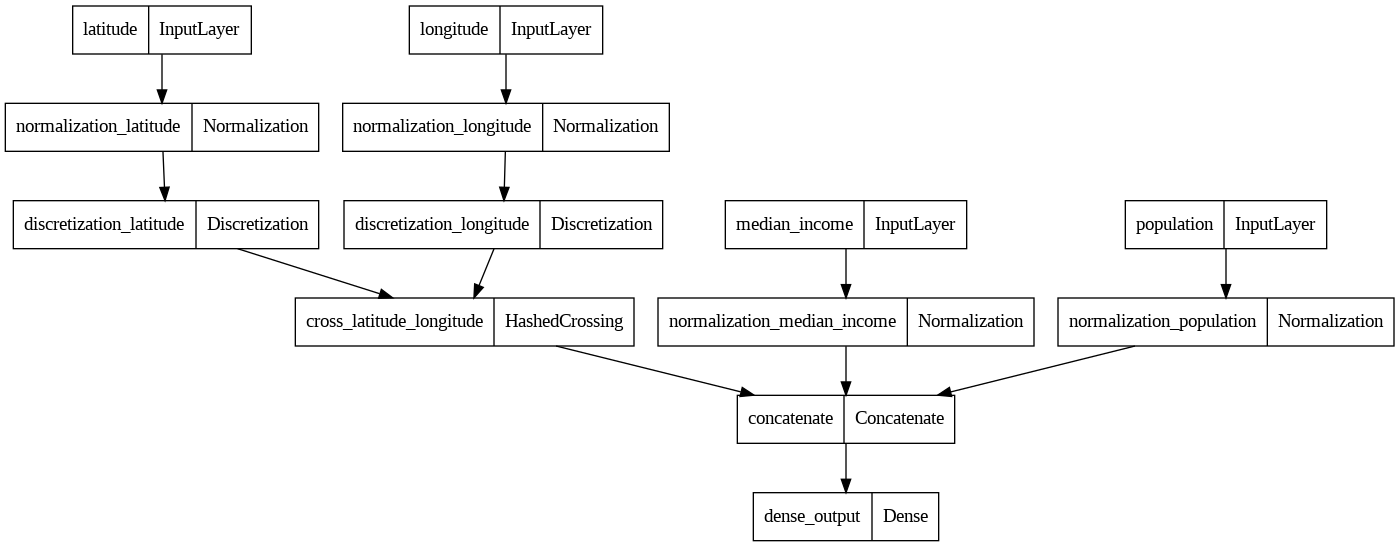

In [ ]:
tf.keras.utils.plot_model(lin_model) #good way to check if the model is structued correctly

In [ ]:
# Split the dataset into features and label.
features = {name:np.array(value) for name, value in train_df.items()}
label = train_median_house_value_normalized(
    np.array(features.pop(label_name))
)

In [ ]:
history = lin_model.fit(
    x=features,
    y=label,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_split=validation_split)

# Get details that will be useful for plotting the loss curve.
epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["mean_squared_error"]

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'households'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


14/14 [==============================] - 1s 31ms/step - loss: 0.9202 - mean_squared_error: 0.9202 - val_loss: 0.7622 - val_mean_squared_error: 0.7622
Epoch 2/15
14/14 [==============================] - 0s 11ms/step - loss: 0.6646 - mean_squared_error: 0.6646 - val_loss: 0.5665 - val_mean_squared_error: 0.5665
Epoch 3/15
14/14 [==============================] - 0s 9ms/step - loss: 0.5024 - mean_squared_error: 0.5024 - val_loss: 0.4508 - val_mean_squared_error: 0.4508
Epoch 4/15
14/14 [==============================] - 0s 9ms/step - loss: 0.4117 - mean_squared_error: 0.4117 - val_loss: 0.3922 - val_mean_squared_error: 0.3922
Epoch 5/15
14/14 [==============================] - 0s 10ms/step - loss: 0.3676 - mean_squared_error: 0.3676 - val_loss: 0.3655 - val_mean_squared_error: 0.3655
Epoch 6/15
14/14 [==============================] - 0s 10ms/step - loss: 0.3481 - mean_squared_error: 0.3481 - val_loss: 0.3551 - val_mean_squared_error: 0.3551
Epoch 7/15
14/14 [=============================

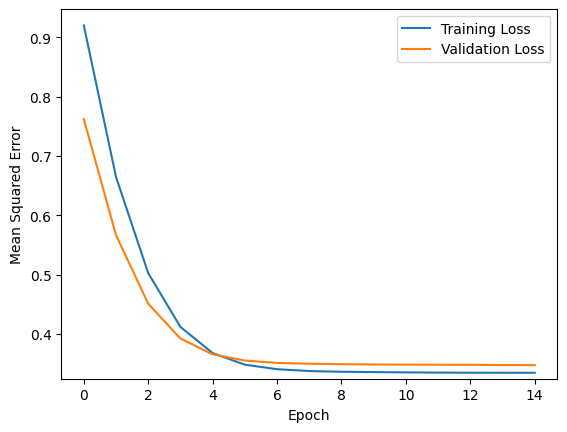

In [ ]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Training Loss")
plt.plot(epochs, history.history["val_mean_squared_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = mse.tolist() + history.history["val_mean_squared_error"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

-----

# Train a Neural Network

In [ ]:
dense_output = tf.keras.layers.Dense(
    units=20,
    activation='relu',
    name='hidden_dense_layer_1')(preprocessing_layers)

# Create a Dense layer with 12 nodes.
dense_output = tf.keras.layers.Dense(
    units=12,
    activation='relu',
    name='hidden_dense_layer_2')(dense_output)

# Create the Dense output layer.
dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(dense_output)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

In [ ]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

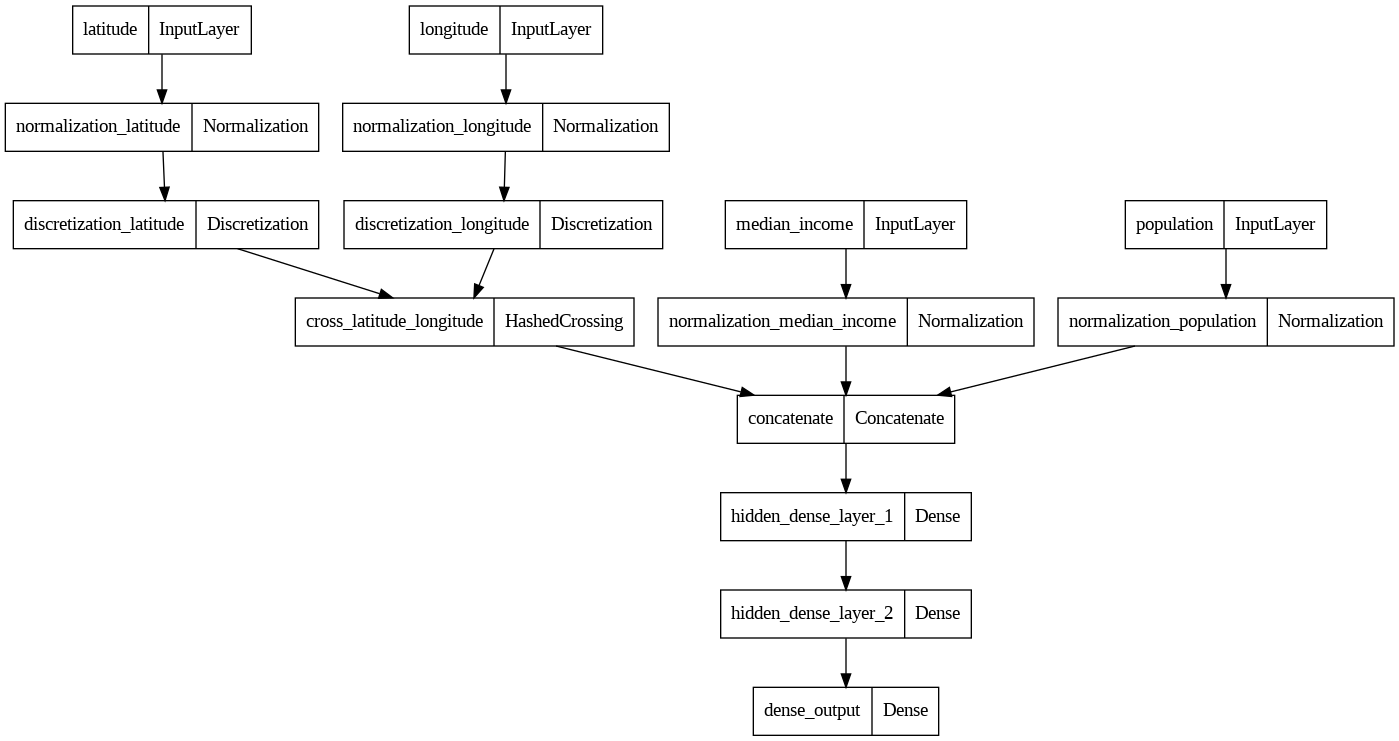

In [ ]:
tf.keras.utils.plot_model(dnn_model)

In [ ]:
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

validation_split = 0.2

In [ ]:
history = dnn_model.fit(
    x=features,
    y=label,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_split=validation_split)

# Get details that will be useful for plotting the loss curve.
epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["mean_squared_error"]

Epoch 1/15
14/14 [==============================] - 2s 52ms/step - loss: 0.6591 - mean_squared_error: 0.6591 - val_loss: 0.4299 - val_mean_squared_error: 0.4299
Epoch 2/15
14/14 [==============================] - 0s 22ms/step - loss: 0.3640 - mean_squared_error: 0.3640 - val_loss: 0.3573 - val_mean_squared_error: 0.3573
Epoch 3/15
14/14 [==============================] - 0s 14ms/step - loss: 0.3309 - mean_squared_error: 0.3309 - val_loss: 0.3389 - val_mean_squared_error: 0.3389
Epoch 4/15
14/14 [==============================] - 0s 13ms/step - loss: 0.3239 - mean_squared_error: 0.3239 - val_loss: 0.3360 - val_mean_squared_error: 0.3360
Epoch 5/15
14/14 [==============================] - 0s 13ms/step - loss: 0.3196 - mean_squared_error: 0.3196 - val_loss: 0.3346 - val_mean_squared_error: 0.3346
Epoch 6/15
14/14 [==============================] - 0s 12ms/step - loss: 0.3175 - mean_squared_error: 0.3175 - val_loss: 0.3316 - val_mean_squared_error: 0.3316
Epoch 7/15
14/14 [================

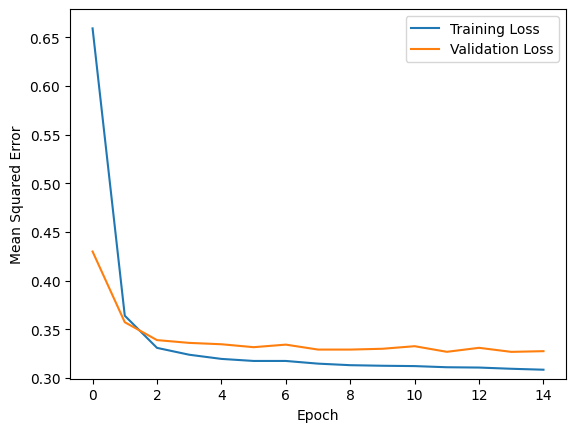

In [ ]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Training Loss")
plt.plot(epochs, history.history["val_mean_squared_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = mse.tolist() + history.history["val_mean_squared_error"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

In [ ]:
# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = test_median_house_value_normalized(np.array(test_features.pop(label_name)))

print("\n Evaluate the new model against the test set:")
dnn_model.evaluate(
    x=test_features,
    y=test_label,
    batch_size=batch_size,
    return_dict=True)


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 10ms/step - loss: 0.3457 - mean_squared_error: 0.3457


{'loss': 0.3457486033439636, 'mean_squared_error': 0.3457486033439636}

# Lab Exercise

Craigslist is the world's largest collection of used vehicles for sale. GitHub user [@AustinReese](https://github.com/AustinReese/UsedVehicleSearch) scraped Craigslist used car ads to create a dataset of 4.25 million listings. We will be using a subset of around 2 million of these listings.

For this lab:

  1. Clean and preprocess your data:
      - Create a training dataset that includes `price`, `ageOfCar` (in years), `manufacturer` (dummy-encoded), `condition` (dummy-encoded), `odometer`, and `isCarvana` (0 or 1)
      - Be sure to remove any outliers from your dataset as you go
  2. Define a feed-forward neural network
      - It should take `ageOfCar`, `manufacturer`, `condition`, `odometer`, and `isCarvana` as inputs
      - It should have 2 hidden layers
          - How many neurons do you think each layer should include? Why?
          - What activation function(s) do you want to use in each layer?
      - It should use MSE as its loss function
      - The final output layer should be a single neuron, and should use either a ReLU or linear activation function
  3. Train your model and evaluate its performance between the training and validation samples
  4. Evaluate your model against the holdout testing dataset

In [ ]:
data = pd.read_csv("https://cdn.c18l.org/vehicles_lab.csv")
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.6,-85.5,2021-05-03T14:02:03-0500
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,NaN,pickup,black,Carvana is the safer way to buy a car During t...,al,32.6,-85.5,2021-05-03T13:41:25-0500
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,NaN,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.6,-85.5,2021-05-03T12:41:33-0500
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,NaN,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6,-85.4,2021-05-03T12:12:59-0500
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.6,-85.5,2021-05-03T11:31:14-0500


In [ ]:
#activation function - I think acts as the starting point and function to follow, kind of changes shape of data, relu - makes most sense when their should never be a negative value
#softmax? dont know tbh
#linear is linear
#neural network kinda looks like a input - hidden layers (general term for internal maths of the model where it spits an output fr) - output

In [ ]:
data['posting_year'] = data['posting_date'].str.extract(r'^([0-9][0-9][0-9][0-9])')
data['posting_year'].describe()

count     192656
unique         1
top         2021
freq      192656
Name: posting_year, dtype: object

In [ ]:
data['car_age'] = data['posting_year'].astype(int) - data['year']
data['car_age'].describe()

count   192656.0
mean        10.5
std          9.5
min         -1.0
25%          5.0
50%          8.0
75%         14.0
max        121.0
Name: car_age, dtype: float64

In [ ]:
data['homecars'] = "toledo" in data['region']
data['homecars']
data.loc['homecars'] = 'TRUE'


SyntaxError: ignored

In [ ]:
inputs = {
    'car_age':
      tf.keras.layers.Input(
        shape=(1,),
        dtype=tf.float32,
        name='car_age',),
    'odometer':
      tf.keras.layers.Input(
              shape=(1,),
              dtype=tf.float32,
              name='odometer',)

}

In [ ]:
input_layer = tf.keras.layers.Concatenate()([
    inputs.get('car_age'),
    inputs.get('odometer')
])

In [ ]:
dense_layer = tf.keras.layers.Dense(
    units=27,
    activation='relu'

)(input_layer)

In [ ]:
dense_layer = tf.keras.layers.Dense(
    units=13,
    activation='relu'
)(dense_layer)

In [ ]:
output_layer = tf.keras.layers.Dense(
    units=1,
    activation='relu'
)(dense_layer)

In [ ]:
outputs = {'dense_outputs':output_layer}

dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)